<a href="https://colab.research.google.com/github/Abderrahmane-Br/Hybrid-model-for-time-series-forecasting/blob/CNN-LSTM/LSTM_CNN(lstm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [657]:
elect_data = pd.read_csv("/content/BrentSpotPrice.csv", index_col="Date")
# elect_data = pd.read_csv("/content/Electric_Production.csv", index_col="DATE")
# elect_data = pd.read_csv("/content/MedicineData.csv", index_col="date")
# elect_data = pd.read_csv("/content/S&P500.csv", index_col="Date")
# elect_data = pd.read_csv("/content/YearlySunspots.csv", usecols=["time", "value"], index_col="time", parse_dates=True)
# elect_data = pd.read_csv("/content/covid_day_wise.csv", usecols=["Date", "New deaths"], index_col="Date")
# elect_data = pd.read_csv("/content/PDB_Load_History.csv", usecols=["date", "demand"], index_col="date")
# elect_data = pd.read_csv("/content/daily-total-female-births-CA.csv", index_col="date")
elect_data.index = pd.to_datetime(elect_data.index)
print(elect_data)

            Brent Spot Price
Date                        
1987-05-15             18.58
1987-05-22             18.54
1987-05-29             18.60
1987-06-05             18.70
1987-06-12             18.75
...                      ...
2016-01-08             34.19
2016-01-15             29.10
2016-01-22             27.76
2016-01-29             31.75
2016-02-05             32.18

[1500 rows x 1 columns]


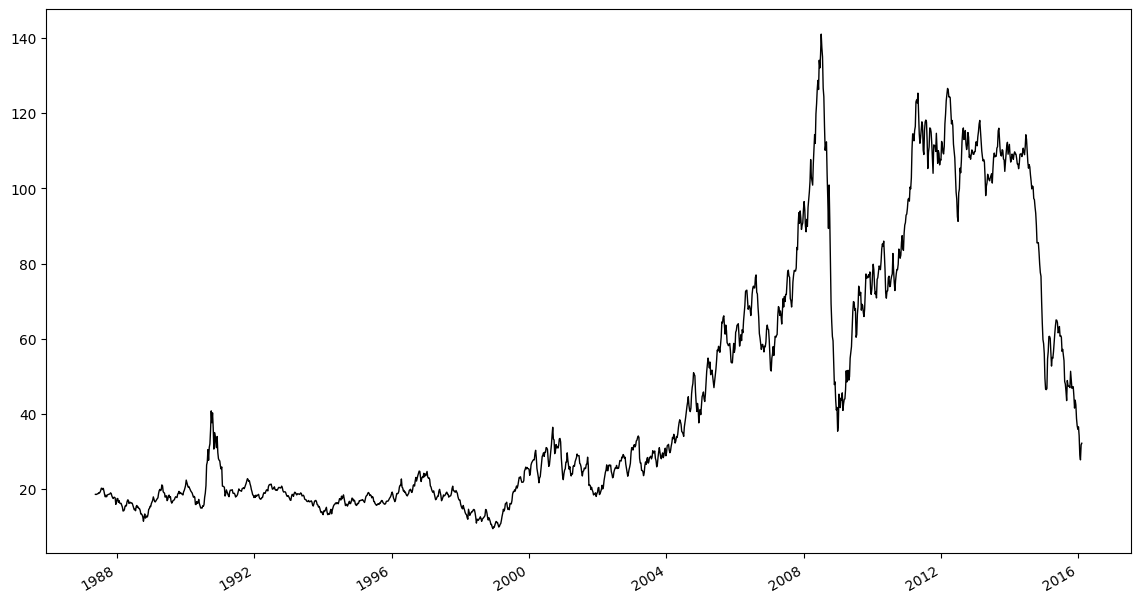

In [658]:
import matplotlib.dates as mdates
plt.rcParams["figure.figsize"] = [14, 8]
loc = mdates.MonthLocator(4)
min_loc = mdates.MonthLocator()
fig, ax = plt.subplots()
# ax.xaxis.set_major_locator(loc)
# ax.xaxis.set_minor_locator(min_loc)
ax.tick_params(colors="black")
plt.xticks(rotation=45)
fig.autofmt_xdate()

ax.plot(elect_data,'-', color="black", linewidth=1)
# plt.savefig('../test1.png', dpi=300)

In [659]:
class CNN_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()

        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)
        self.linear = nn.Linear(hidden_size, 1)

    def forward(self, input):
        out, (hidden, cell) = self.lstm(input.view(len(input), 1))
        out = self.linear(out)
        return out

In [660]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(elect_data)
train_scaled = scaler.transform(elect_data)
print(train_scaled)
split_point = int(len(train_scaled) * 0.7)
# inputs = torch.tensor(elect_data["Brent Spot Price"], dtype=torch.float32)
train_set = torch.tensor(train_scaled[:split_point], dtype=torch.float32)
test_set = torch.tensor(train_scaled[split_point:], dtype=torch.float32)

[[0.06943706]
 [0.06913318]
 [0.069589  ]
 ...
 [0.139178  ]
 [0.16949024]
 [0.17275697]]


In [661]:
model = CNN_LSTM(1, 40, 2)
optimizer = torch.optim.Adam(model.parameters(), lr= 0.01)
loss_fun = nn.MSELoss()
epochs = 250

In [662]:
for epoch in range(epochs): 
    out = model(train_set)
    loss = loss_fun(out, train_set)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % 10 == 0: 
        print(loss)

tensor(0.0178, grad_fn=<MseLossBackward0>)
tensor(0.0121, grad_fn=<MseLossBackward0>)
tensor(0.0009, grad_fn=<MseLossBackward0>)
tensor(0.0012, grad_fn=<MseLossBackward0>)
tensor(0.0005, grad_fn=<MseLossBackward0>)
tensor(0.0003, grad_fn=<MseLossBackward0>)
tensor(0.0003, grad_fn=<MseLossBackward0>)
tensor(0.0002, grad_fn=<MseLossBackward0>)
tensor(0.0002, grad_fn=<MseLossBackward0>)
tensor(0.0002, grad_fn=<MseLossBackward0>)
tensor(0.0002, grad_fn=<MseLossBackward0>)
tensor(0.0001, grad_fn=<MseLossBackward0>)
tensor(0.0001, grad_fn=<MseLossBackward0>)
tensor(0.0001, grad_fn=<MseLossBackward0>)
tensor(0.0001, grad_fn=<MseLossBackward0>)
tensor(9.1860e-05, grad_fn=<MseLossBackward0>)
tensor(8.2823e-05, grad_fn=<MseLossBackward0>)
tensor(7.4818e-05, grad_fn=<MseLossBackward0>)
tensor(6.7470e-05, grad_fn=<MseLossBackward0>)
tensor(6.0606e-05, grad_fn=<MseLossBackward0>)
tensor(5.4164e-05, grad_fn=<MseLossBackward0>)
tensor(4.8116e-05, grad_fn=<MseLossBackward0>)
tensor(4.2450e-05, grad_fn

In [ ]:
test_out = model(test_set).detach()
print(loss_fun(test_out, test_set))

In [ ]:
train_set_np = np.array(train_set)
print(test_set)
test_out = np.array(test_out)
# results = scaler.inverse_transform(np.concatenate((train_set_np, test_out)))
results = scaler.inverse_transform(test_out)
plt.plot(elect_data[split_point:], linewidth=0.9)
results_df = pd.DataFrame(data = results, index=elect_data.index[split_point:])
# print(results_df)
plt.grid(True)
plt.plot(results_df, color="red", linewidth=0.7)
plt.legend(["Actual", "Prediction"])

##sliding window lstm


In [700]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size=1):
        super().__init__()

        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, input):
        out, (hidden, cell) = self.lstm(input.view(len(input), 1))
        out = self.linear(out)
        
        return out[-1]

In [707]:
def slide(model, optimizer, sequence, lookback, horizon): 

  seq_len = len(sequence)
  results = [None] * (seq_len - lookback)
  for i in range(0, seq_len - lookback - horizon + 1):
    out = model(sequence[i:i+lookback])
    # print(sequence[i:i+lookback])
    loss = loss_fun(out, sequence[i+lookback: i+lookback+horizon])
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    temp = out.detach().flatten().tolist()
    # print(temp)
    results[i: i+horizon] = [*temp]
  # out = model(sequence[0:lookback])
  # results[0:] = out
  # print(results)

  return results


In [715]:
lookback = 50
horizon = 10
model = LSTM(1, 15, 1, horizon)
optimizer = torch.optim.Adam(model.parameters(), lr= 0.05)
loss_fun = nn.MSELoss()
epochs = 250

In [716]:
results = []
for epoch in range(epochs): 
  # results = slide(model, optimizer, torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,11, 12, 13, 14, 15], dtype=torch.float32), lookback, horizon)
  results = slide(model, optimizer, train_set, lookback, horizon)
# print(list(map(lambda x: np.array(x), results)))
# results = [el for res in results for el in res]
print((results))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[0.4386478662490845, 0.3693420886993408, 0.2555283010005951, 0.12048282474279404, -0.013268516398966312, -0.12371035665273666, -0.1939413845539093, -0.2173323780298233, -0.19747544825077057, -0.1439763307571411, -0.06902360171079636, 0.014278382994234562, 0.09296277165412903, 0.15565049648284912, 0.19419212639331818, 0.20507016777992249, 0.18974441289901733, 0.15331867337226868, 0.10296943038702011, 0.04688113182783127, -0.006711101159453392, -0.05055936798453331, -0.07939284294843674, -0.09050902724266052, -0.08401627838611603, -0.06231148913502693, -0.029714278876781464, 0.008470560424029827, 0.0468859039247036, 0.08066777139902115, 0.10611281543970108, 0.12101531028747559, 0.12473168224096298, 0.11810065805912018, 0.10331650078296661, 0.08342105895280838, 0.06188412010669708, 0.04199734702706337, 0.026578674092888832, 0.017591776326298714, 0.01584683731198311, 0.021089889109134674, 0.032222308218479156, 0.047593142837285995, 0.06507745385169983, 0.08227963000535965, 0.09702032804489

tensor(0.0266)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1000, 1])) that is different to the input size (torch.Size([1000])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


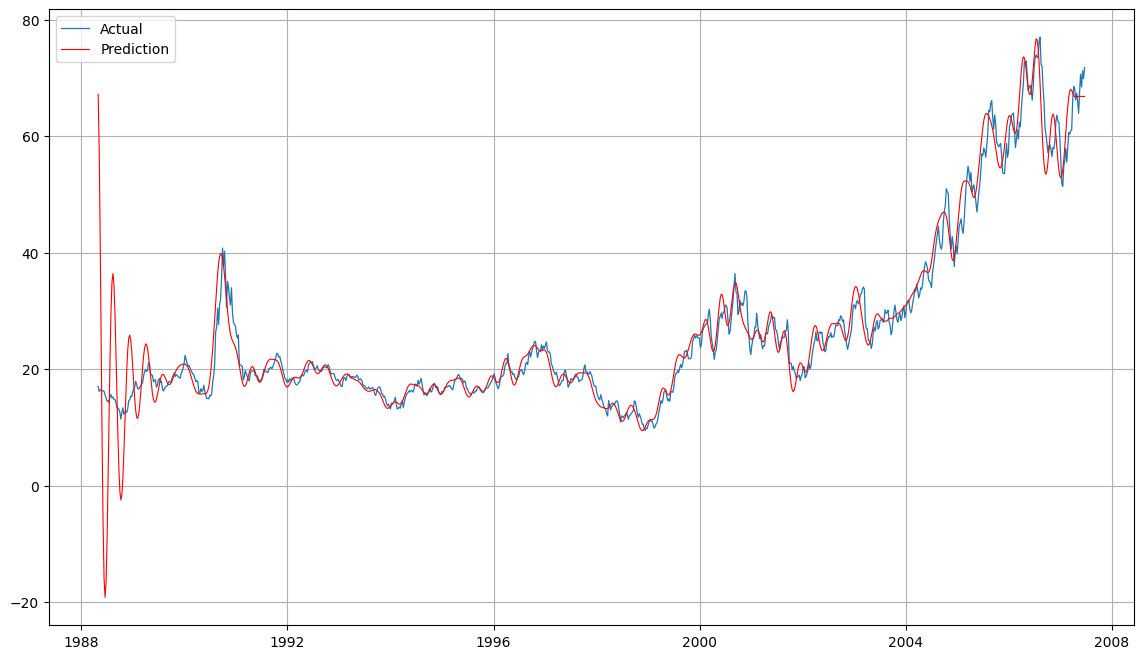

In [724]:
print(loss_fun(torch.tensor(results),train_set[lookback:]))
# print(len(elect_data.index[lookback:split_point]))
scaled_res = scaler.inverse_transform(np.array(results).reshape(-1, 1))
# print(scaled_res)
# print(np.array(results).reshape(-1, 1))
plt.plot(elect_data[lookback:split_point], linewidth=0.9)
results_df = pd.DataFrame(data = scaled_res, index=elect_data.index[lookback:split_point])
# # print(results_df)
plt.grid(True)
plt.plot(results_df, color="red", linewidth=0.8)
plt.legend(["Actual", "Prediction"])

In [738]:
slide_test_set = torch.cat((train_set[-lookback:], test_set))
slide_test_out = slide(model, optimizer, slide_test_set, lookback, horizon)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.0758)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([450, 1])) that is different to the input size (torch.Size([450])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


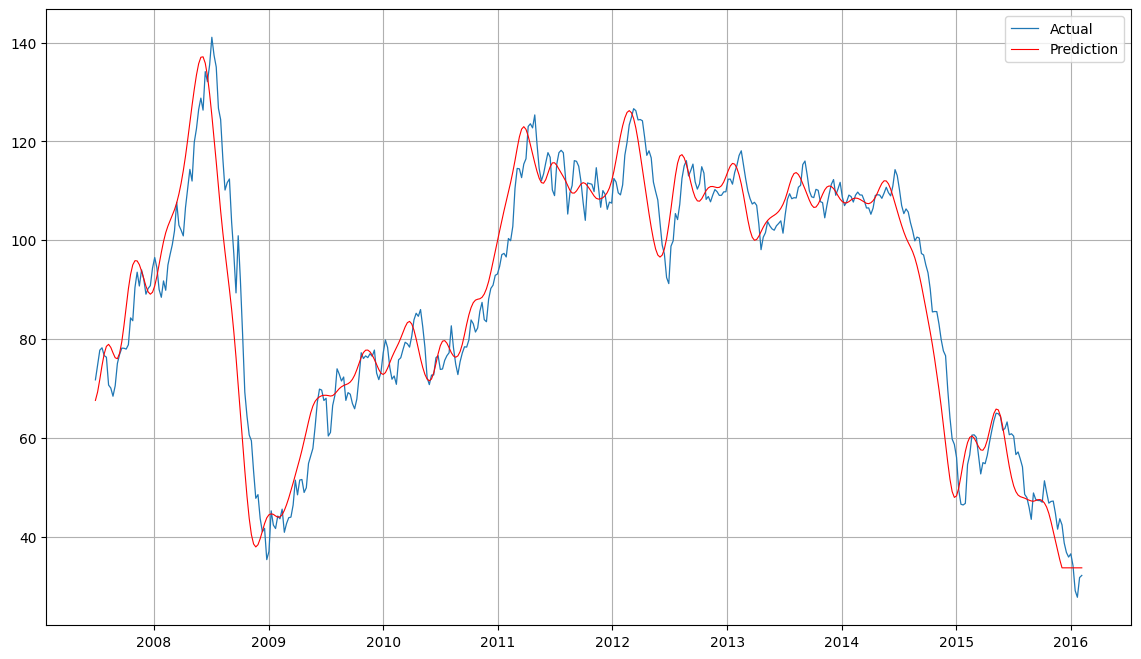

In [741]:
print(loss_fun(torch.tensor(slide_test_out),test_set))
scaled_res = scaler.inverse_transform(np.array(slide_test_out).reshape(-1, 1))
plt.plot(elect_data[split_point:], linewidth=0.9)
results_df = pd.DataFrame(data = scaled_res, index=elect_data.index[split_point:])
plt.grid(True)
plt.plot(results_df, color="red", linewidth=0.8)
plt.legend(["Actual", "Prediction"])

In [611]:

tn = torch.tensor([1, 2, 3], dtype=torch.float32)
tn2 = torch.tensor([1, 1, 1], dtype=torch.float32)
lin = nn.Linear(5, 2)
lstm = nn.LSTM(1, 5, 1)
out, _ = lstm(tn.view(3, 1))
out2, _ = lstm(tn2.view(3, 1))
print(out[1:])
print(torch.cat((out, out2, torch.empty(0))))
print()
print(lin(out))

tensor([[ 0.2937, -0.5057, -0.0788, -0.0669, -0.1066],
        [ 0.4689, -0.6161, -0.0613, -0.0897, -0.1205]],
       grad_fn=<SliceBackward0>)
tensor([[ 0.0916, -0.3142, -0.0646, -0.0201, -0.0612],
        [ 0.2937, -0.5057, -0.0788, -0.0669, -0.1066],
        [ 0.4689, -0.6161, -0.0613, -0.0897, -0.1205],
        [ 0.0916, -0.3142, -0.0646, -0.0201, -0.0612],
        [ 0.1631, -0.4036, -0.0865, -0.0493, -0.0822],
        [ 0.2027, -0.4251, -0.0947, -0.0670, -0.0948]], grad_fn=<CatBackward0>)

tensor([[0.0207, 0.4585],
        [0.1691, 0.4354],
        [0.2704, 0.4018]], grad_fn=<AddmmBackward0>)


In [668]:
def slide2(model, optimizer, sequence, lookback, horizon): 

  seq_len = len(sequence)
  results = torch.empty(0)
  for i in range(0, seq_len - lookback - horizon + 1):
    out = model(sequence[i:i+lookback])
    # print(sequence[i:i+lookback])
    # loss = loss_fun(out, sequence[i+lookback: i+lookback+horizon])
    # loss.backward()
    # optimizer.step()
    # optimizer.zero_grad()
    # temp = out.detach().flatten().tolist()
    # print(temp)
    # results[i: i+horizon] = [*temp]
    results = torch.cat((results[:i], out))
  # out = model(sequence[0:lookback])
  # results[0:] = out
  # print(results)

  return results


In [704]:
lookback = 50
horizon = 10
model = LSTM(1, 15, 1, horizon)
optimizer = torch.optim.Adam(model.parameters(), lr= 0.05)
loss_fun = nn.MSELoss()
epochs = 250

In [705]:
testing_torch = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,11, 12, 13, 14, 15], dtype=torch.float32)
results = []
for epoch in range(epochs): 
  # results = slide2(model, optimizer, testing_torch, lookback, horizon)
  results = slide2(model, optimizer, train_set, lookback, horizon)
  loss = loss_fun(results, train_set[lookback:])
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
# print(list(map(lambda x: np.array(x), results)))
# results = [el for res in results for el in res]
# print((results))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1000, 1])) that is different to the input size (torch.Size([1000])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [706]:
results = results.detach().reshape(-1, 1).tolist()
results = scaler.inverse_transform(results)
print(results)

[[26.41119745]
 [26.41285879]
 [26.41424356]
 [26.41197418]
 [26.41215855]
 [26.41258026]
 [26.41201144]
 [26.41225466]
 [26.41277641]
 [26.41215463]
 [26.41156227]
 [26.40987544]
 [26.41036776]
 [26.40813368]
 [26.41008335]
 [26.41183688]
 [26.41060509]
 [26.41121118]
 [26.41044229]
 [26.41073259]
 [26.410864  ]
 [26.40863188]
 [26.40850047]
 [26.4085142 ]
 [26.40856519]
 [26.40465408]
 [26.4056348 ]
 [26.40907713]
 [26.40689601]
 [26.40651941]
 [26.40756682]
 [26.4063723 ]
 [26.40627031]
 [26.40915755]
 [26.40929289]
 [26.41079535]
 [26.40984601]
 [26.41089931]
 [26.41169957]
 [26.4114642 ]
 [26.41438675]
 [26.41452797]
 [26.41303728]
 [26.41206244]
 [26.41228212]
 [26.41255476]
 [26.41302355]
 [26.4119271 ]
 [26.41327657]
 [26.41493595]
 [26.41654825]
 [26.41561069]
 [26.41390816]
 [26.41707392]
 [26.41962771]
 [26.41666006]
 [26.41562049]
 [26.41673459]
 [26.41406311]
 [26.41385716]
 [26.41606574]
 [26.41295097]
 [26.41175646]
 [26.41353548]
 [26.41536943]
 [26.41378459]
 [26.41574